# Make Big Plot 

Code for combining all data to do with wildfire DRF effect

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr

# display all columns
pd.options.display.max_columns = None
pd.options.display.max_rows = 10000

In [2]:
# user inputs

# enter study start and end dates, formatted "dd/mm/yyyy"
interval_start = "01/07/2019"
interval_end = "01/09/2019"

In [3]:
# convert inputs to a pandas dataframe
start = pd.to_datetime(interval_start, format="%d/%m/%Y")
end = pd.to_datetime(interval_end, format="%d/%m/%Y")

interval = pd.date_range(start, end, freq="1H")
interval_df = pd.DataFrame({"datetime":interval})

In [4]:
# get the datasets
path_to_data = "C:/Users/Owner/Wildfire_Smoke_Mckendry/data/out_data/"

# csv format makes datetimes into strings. convert them back
# to pandas Timestamp objects
aeronet = pd.read_csv(path_to_data + "aeronet_aod.csv")
aeronet["datetime"] = pd.to_datetime(aeronet["datetime"])

hazmap = pd.read_csv(path_to_data + "hazmap_wask.csv")
hazmap["datetime"] = pd.to_datetime(hazmap["datetime"])

fluxes = pd.read_csv(path_to_data + "OBS_ameriflux.csv")
fluxes["datetime"] = pd.to_datetime(fluxes["datetime"])


In [5]:
# join all dataframes by date inside of spec interval
full_dataset = interval_df.merge(aeronet, how="left", on="datetime")
full_dataset = full_dataset.merge(hazmap, how="left", on="datetime")
full_dataset = full_dataset.merge(fluxes, how="left", on="datetime")

In [10]:
full_dataset.to_csv("C:/Users/Owner/Wildfire_Smoke_Mckendry/data/out_data/drf_test.csv")

In [14]:
# calculate the covariance between any two variables
cov = np.cov(full_dataset["smoke"], full_dataset["AOD_500nm"])

cov[0,0]

6.358239996533721

In [18]:
def spearman_correlate(val1, val2):
    """
    Calculates the spearman correlation between 
    two variables in the master dataset
    
    in: any pair of keys 
    """
# Spearman's correlation coefficient for ordinal data (smoke levels arent ratio data!)
# https://towardsdatascience.com/discover-the-strength-of-monotonic-relation-850d11f72046
cor, pval = spearmanr(full_dataset["smoke"], full_dataset["AOD_500nm"], nan_policy="omit")

print(f"correlation: {cor}")
print(f"p - value:   {pval}")

correlation: 0.1945206828547482
p - value:   0.12977268062076777


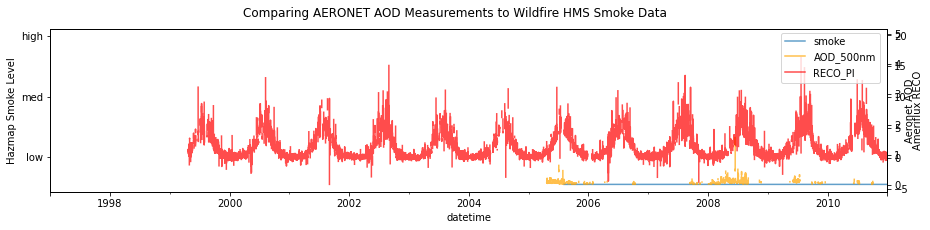

In [9]:
fig, ax1 = plt.subplots(figsize=(15,3))

# hazmap
hazmap.plot("datetime", "smoke", ax=ax1, alpha=0.7, legend=False)
plt.yticks(ticks=[5,16,27], labels=["low", "med", "high"])
ax1.set_ylabel("Hazmap Smoke Level")

ax2 = ax1.twinx()
aeronet.plot("datetime", "AOD_500nm", ax=ax2, color="orange", alpha=0.7, legend=False)
ax2.set_ylabel("Aeronet AOD")

ax3 = ax1.twinx()
fluxes.plot("datetime", "RECO_PI", ax=ax3, color="red", alpha=0.7, legend=False)
ax3.set_ylabel("Ameriflux RECO")

fig.suptitle("Comparing AERONET AOD Measurements to Wildfire HMS Smoke Data")
plt.figlegend(loc=(0.84,0.64));

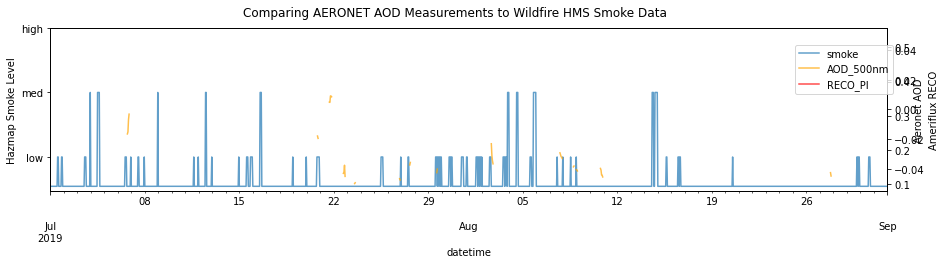

In [8]:
fig, ax1 = plt.subplots(figsize=(15,3))

# hazmap
full_dataset.plot("datetime", "smoke", ax=ax1, alpha=0.7, legend=False)
plt.yticks(ticks=[5,16,27], labels=["low", "med", "high"])
ax1.set_ylabel("Hazmap Smoke Level")

ax2 = ax1.twinx()
full_dataset.plot("datetime", "AOD_500nm", ax=ax2, color="orange", alpha=0.7, legend=False)
ax2.set_ylabel("Aeronet AOD")

ax3 = ax1.twinx()
full_dataset.plot("datetime", "RECO_PI", ax=ax3, color="red", alpha=0.7, legend=False)
ax3.set_ylabel("Ameriflux RECO")

fig.suptitle("Comparing AERONET AOD Measurements to Wildfire HMS Smoke Data")
plt.figlegend(loc=(0.84,0.64));